## Homework 6, Problem 1 on reaching data and neural data

ECE C143A/C243A, Spring Quarter 2022, Prof. J.C. Kao, TAs T. Monsoor and W. Yu

Total: 20 points

Download the dataset `JR_2015-12-04_truncated2.mat` from BruinLearn.

This data structure contains simultaneous reaching (kinematic) data and neural data.
A large part of this question will be getting acquainted with this data.

Loading the downloaded file will drop a variable called `R`, in your Python workspace.
We will call this variable the R-dict (or sometimes R-struct).

It is an array of dictionaries, with each dictionary in the array corresponding to one trial performed by Monkey J. In this data, Monkey J is performing a reaching task in which he acquires a center target, and then a peripheral target. After acquiring the peripheral target, he comes back to acquire the center target, and then acquires another peripheral target. This task is called a "center-out-and-back" task as the monkey continuously reaches from the center to a peripheral target, and then back to the center.

This assignment incorporates the `scipy` package.  If you do not have it installed, you can install it by running:

`pip install scipy`

You may also install a package compiler for scientific computing, like `anaconda`: https://www.anaconda.com/download/

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import scipy.io as sio
import math
import nsp as nsp
# Load matplotlib images inline
%matplotlib inline
# Reloading any code written in external .py files.
%load_ext autoreload
%autoreload 2
data = sio.loadmat('JR_2015-12-04_truncated2.mat') # load the .mat file.
R = data['R'][0,:]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### (a) (1 point) How many trials?

How many trials were performed by Monkey J in this R-struct?

In [142]:
#====================================================#
# YOUR CODE HERE:
#   Calculate the number of trials in the R-dict
#====================================================#
num_trials = len(R)
print("trials:", num_trials)
#====================================================#
# END YOUR CODE
#====================================================#

trials: 506


Answer: 
506 trials were performed

### (b) (2 point) Where are the targets?

`R[i]['target']` is the target that Monkey J reached to on trial `i`.  How many unique targets are there?  Please provide a 2D plot of all the target locations.  Ignore the 3rd dimension ($z$-location) which is by default set at $-70$ (i.e., it was not used). The units of `R[0,i]['target']` are in millimeters.


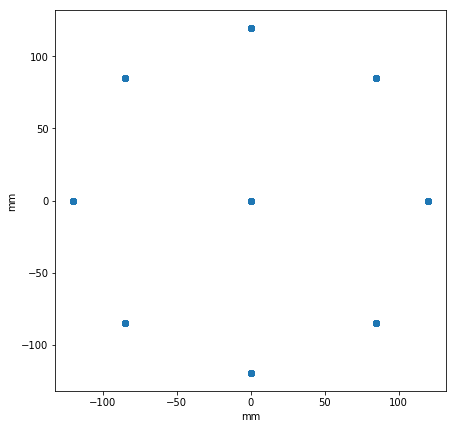

In [143]:
plt.figure(figsize=(7,7))
#====================================================#
# YOUR CODE HERE:
#   Generate 2D plot of all the target locations 
#====================================================#
x ,y  = np.zeros(num_trials),np.zeros(num_trials)
for i in range(num_trials):
    loc = R[i]['target']
    x[i] = loc[0]
    y[i] = loc[1]
plt.scatter(x,y)
plt.xlabel("mm")
plt.ylabel("mm")

#====================================================#
# END YOUR CODE
#====================================================#
plt.show()

Question: How many unique targets(including the center target) are there?

Answer: 
As shown in the plot above, there are 9 unique targets including the center target.

### (c) (1 point) How many failures?

`R[i]['isSuccessful']` indicates if Monkey J successfully acquired the target on trial $i$.  This means that he reaches to the target and holds his position within a $4$cm by $4$cm box centered around the target for $500$ms.  How many failures are there in this R-struct? 

Hint: `isSuccessful` attribute has the dtype of uint8. Be careful about data types; in general it's always good practice to perform operations on same data types.  If the number of trials is encoded as an `int`, you should cast the `isSuccessful` variable to be an int. You may achieve this by calling `isSuccessful = np.asarray(R['isSuccessful'], dtype=int)`.

In [144]:
#====================================================#
# YOUR CODE HERE:
#   Calculate the number of failures in the R-dict
#====================================================#
isSuccessful =np.asarray(R['isSuccessful'])
successes = np.sum(isSuccessful)
fail = num_trials-successes
print("Failure Count: ", fail[0,0])
#====================================================#
# END YOUR CODE
#====================================================#

Failure Count:  256


Question: How many failures are there in this R-struct?

Answer: There were 256 failures in this R-struct.

### (d) (2 points) Kinematic sampling. [Code is provided; but you still need to analyze the output and answer the question]

`R[i]['cursorPos']` is a $3 \times T_i$ matrix that contains the monkey's hand position over time on trial $i$, where $T_i$ is the length of trial $i$ in milliseconds. 

* The 1st row is the $x$ position and the 2nd row is the $y$ position of Monkey J.
* The units are in millimeters.
* Ignore the 3rd row -- which is $z$ position (set to $-70$ mm by default in this data).
* Each column represents $1$ ms.  That is, if $T_i = 1032$, this indicates that the trial lasted for $1032$ milliseconds. Note that `R[i]['cursorPos'][:,-1]` and `R[i+1]['cursorPos'][:,0]` are also separated by $1$ ms, so that the R-struct contains millisecond resolution data and no segments of time are unobserved.
* The kinematics in `R[0,i]['cursorPos']` are sampled from a system called 'Polaris' that tracks a bead taped on the monkey's finger.
		
Observe the values of `R[i]['cursorPos']`.
Does the ''Polaris'' system sample the monkey's kinematics at $1$ ms resolution (i.e., $1000$ Hz)?
If not, approximately at what frequency does Polaris sample the kinematics?        

In [145]:
#set printoption so that you can view the whole array by call print 
np.set_printoptions(threshold=np.nan)
#====================================================#
# YOUR CODE HERE:
#   Analysis the frequency of sampling
#====================================================#
i=1
print(R[i]['cursorPos'][:,0:200]) 
# we just print 0:200 because there are too many elements, 200 is enough to estimate the frequency

#====================================================#
# END YOUR CODE
#====================================================#

[[  1.73   1.73   1.73   1.73   1.73   1.73   1.73   1.73   1.73   1.73
    1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96   1.96
    1.96   1.96   1.96   1.96   1.96   1.96   2.23   2.23   2.23   2.23
    2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23   2.23
    2.23   2.23   2.23   2.47   2.47   2.47   2.47   2.47   2.47   2.47
    2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47   2.47
    2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66   2.66
    2.66   2.66   2.66   2.66   2.66   2.66   2.83   2.83   2.83   2.83
    2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83   2.83
    2.83   2.83   2.83   2.93   2.93   2.93   2.93   2.93   2.93   2.93
    2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93   2.93
    2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99   2.99
    2.99   2.99   2.99   2.99   2.99   2.99   3.05   3.05   3.05   3.05
    3.05   3.05   3.05   3.05   3.05   3.05   3.05   3.05   3.05

Question: Does the 'Polaris' system sample the monkey's kinematics at  1  ms resolution (i.e., 1000Hz)? If not, approximately at what frequency does Polaris sample the kinematics?

Answer: 

The 'Polaris' system does not appear to sample the kinematics at a 1 ms resolution. There appears to be a zero order hold that takes place for 16 to 17 mS. so given a 16.5 mS sampling period, we can estimate the 'Polaris' system samples at about 60.6 Hz.

### (e) (1 points) Reach trajectories.

Present a 2D plot showing Monkey J's hand position across the entire R-dict. Does it look like the plot of a center-out-and-back task?

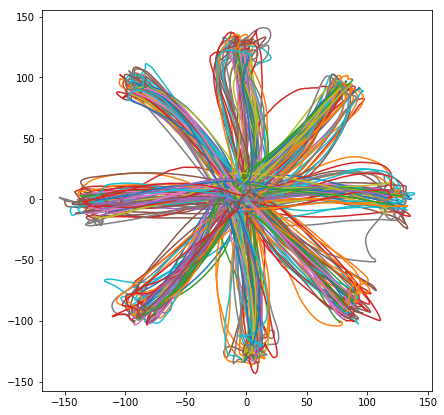

In [146]:
#====================================================#
# YOUR CODE HERE:
#   Generate 2D plot of hand position
#====================================================#
plt.figure(figsize=(7,7))

for i in range(num_trials):
    kinematics = R[i]['cursorPos']
    plt.plot(kinematics[0,:], kinematics[1,:])
#====================================================#
# END YOUR CODE
#====================================================#

Question: Does it look like the plot of a center-out-and-back task?

Answer:
Yes, this appears to be the pplot of a center-out-and back task. We can see the positions moving from the center to each of the target locations and back to the center target. Or at least the behavior on the whole appears to be doing so.

### (f) (1 points) Number of electrodes.

The R-struct contains neural data recorded from electrode arrays implanted in Monkey J's motor cortex.

We'll only consider `R[i]['spikeRaster']`, which is an $N \times T_i$ matrix of activity from primary motor cortex (M1).

(There is an `R[i]['spikeRaster2']`, which we will ignore. It contains activity from PMd.)

There are $N$ electrodes, and each electrode is measuring spiking activity. Each row of `R[i]['spikeRaster']` corresponds to the spiking activity, at millisecond resolution, for Monkey J. If the value of row $n$ and column $t$ is 1, then it indicates that a neuron spiked on electrode $n$ at time $t$. If the value of this entry is 0, it indicates that no spike occurred on electrode $n$ at time $t$.

Note that we store `R[i]['spikeRaster']` as a sparse matrix, since a neuron is often not spiking (corresponding to $0$'s).

It is more memory efficient to store the locations of the non-zero values in the matrix than to store the entire matrix.

In Python, one may use the command `.todense()` to make this a standard matrix.

How many electrode channels are there?         

In [147]:
#====================================================#
# YOUR CODE HERE:
#   Calculate the number of electrode channels
#====================================================#
raster_shape = R[6]['spikeRaster'].todense().shape
print(raster_shape[0])
#====================================================#
# END YOUR CODE
#====================================================#

96


Question: How many electrode channels are there?     

Answer:

There are 96 electrode channels.

### (g) (4 points) Spike raster. [Code solution provided; please understand it]

Plot a spike raster of all reaches to the right target, located at (120 mm,0 mm), for electrode 17.          
(Hint: use the `nsp.PlotSpikeRaster` function in `nsp.py`.)     

Text(0.5,1,'Spike Raster')

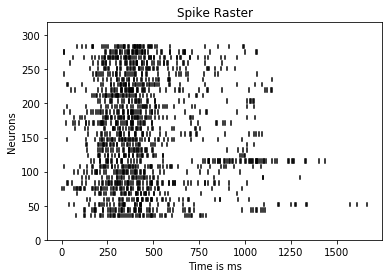

In [148]:
#====================================================#
# YOUR CODE HERE:
#  Generate spike raster of all reaches to the right target
#====================================================#
spike_train = np.empty((0,0),dtype = list)
f = 0
for i in range(num_trials):
    target = R[i]['target'][0:2]    
    if target[0]==120 and target[1]== 0 :
        spike_train = np.append(spike_train,0)
        spike_train[f] =  R[i]['spikeRaster'][16,:].todense().nonzero()[1]
        f = f + 1
nsp.PlotSpikeRaster(spike_train)
plt.xlabel('Time is ms')
plt.ylabel('Neurons')
plt.title('Spike Raster')
#====================================================#
# END YOUR CODE
#====================================================#

### (h) (4 points) ISI distribution.

Plot the ISI distribution for electrode 17 across all trials in the R-dict (i.e., one ISI histogram with data from all reaches).  
Make the ISI histogram bins $10$ ms wide. Did we spike sort this neural data?

(14785,)


Text(0,0.5,'Relative frequency')

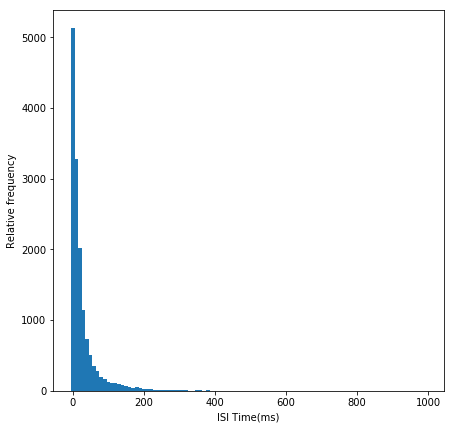

In [149]:
#====================================================#
# YOUR CODE HERE:
#   Generate the ISI distribution for electrode 17
#====================================================#
plt.figure(figsize=(7,7))
times = np.array([])
for i in range(num_trials):
    locs = np.nonzero(R[i]['spikeRaster'].todense()[16])
    diffs = np.diff(np.insert(locs[1],0,0))
    times = np.append(times,diffs)
times = np.array(times)
bins = np.arange(0,1000,10)
vals = np.zeros_like(bins)
print(times.shape)

for i in range(len(bins)):
    for j in range(len(times)):
        if bins[i]<bins[-1]:
            vals[i] += np.sum((times[j]>=bins[i])*(times[j]<bins[i+1]))
        else:
            vals[i] += np.sum(np.sum((times[j]>=bins[i])*(times[j]<1001)))
plt.bar(bins,vals, width=10)
plt.xlabel("ISI Time(ms)")
plt.ylabel("Relative frequency")
#====================================================#
# END YOUR CODE
#====================================================#

Question: Did we spike sort this neural data?

Answer:    
yes the nerual data was spike sorted. we can notice that if we make a finer bin width, there is evidence of a absolute refractory period in the first 1-2 seconds. With multiple neruons firing we would not likely observe this phenomenon.

### (i) (4 points) PSTH.

Plot the average firing rate for each of 8 unique peripheral reach directions for electrode 17.

To do so, we have provided a binning function, `nsp.bin` which takes a spike raster matrix and counts the spikes in non-overlapping windows of some length $\Delta t$ (to be specified as an input) for each neuron.

Do the following: 
* Call `nsp.bin` in the correct way to bin the spikes in non-overlapping $25$ ms bins.
* Then, for each of the $8$ unique center-out reach conditions, average the binned spike counts for electrode 17, from $t=0$ to $500$ ms.
* For each of these traces, smooth them by using smooth function in `nsp.smooth` with `window_len = 5`, i.e., if one of these 8 traces was stored as the variable `trace`, you would call `trace = nsp.smooth(trace, window_len = 5)`.
* You should now have 8 traces of averaged binned spike counts for electrode 17.
* Plot these average, smoothed, firing rates through time on the same plot (x-axis time in ms, y-axis firing rate; be sure to get the unit scale correct. Use a different color for each of the 8 reach conditions. Note, these trial-averaged plots of the firing rate are often called peri-stimulus time histograms, or PSTHs. We do this to visualize the data and be sure it makes sense.

Text(0.5,1,'PSTH by target')

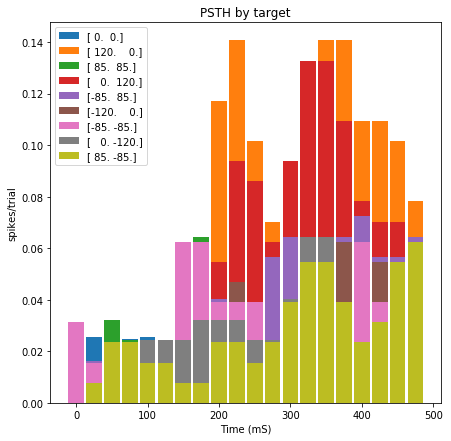

In [150]:
#====================================================#
# YOUR CODE HERE:
#   Perform the above described tasks to generate a PSTH.
#====================================================#
plt.figure(figsize=(7,7))
bin_width=25
avg_spikes = np.zeros((9,int(500/bin_width)))
bins = np.arange(0,500,25)
target_count = np.zeros((9,))
targets = [[0,0], [120,0], [84.850000000000009,84.850000000000009], [0,120], [-84.850000000000009,84.850000000000009], [-120,0], [-84.850000000000009,-84.850000000000009], [0,-120], [84.850000000000009,-84.850000000000009]]
for i in range(num_trials):
    binned = nsp.bin(R[i]['spikeRaster'][16],bin_width,'first')
    #print(binned[0])
    target = [R[i]['target'][0][0],R[i]['target'][1][0]]
    target_index = targets.index(target)
    #print(target_index)
    avg_spikes[target_index,:] = avg_spikes[target_index,:] + np.array(binned[0][0:int(500/25)])
    target_count[target_index] +=1.
for i in range(len(targets)):
    avg_spikes[i,:] /=float(target_count[i])
    avg_spikes[i,:] = nsp.smooth(avg_spikes[i,:], window_len=5)
    plt.bar(bins,avg_spikes[i,:], width =22, bottom=0)
    
plt.legend(np.round(targets), loc="upper left")
plt.xlabel("Time (mS)")
plt.ylabel("spikes/trial")
plt.title("PSTH by target")
#====================================================#
# END YOUR CODE
#====================================================#